In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

In [2]:
df = pd.read_csv('../data/fenomeno/stereotipi/Opinioni su violenza sessuale - età (2018).csv')
df = df[["SEXISTAT1", "Classe di età", "STEREOTIPI", "Stereotipi sui ruoli di genere, comportamenti nella coppia", "Grado di accordo", "Value"]]
df.head()

,SEXISTAT1,Classe di età,STEREOTIPI,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accordo,Value
0,M,30-44 anni,WPROVSEX,le donne possono provocare la violenza sessual...,molto d'accordo,6.3
1,M,30-44 anni,WABLAVO,le donne che non vogliono un rapporto sessuale...,molto d'accordo,13.0
2,M,30-44 anni,SEWNRAP,le donne serie non vengono violentate,molto d'accordo,1.9
3,M,30-44 anni,HUSFNVIO,se un marito/compagno obbliga la moglie/compag...,molto d'accordo,0.7
4,M,30-44 anni,WOFSREM,di fronte a una proposta sessuale le donne spe...,molto d'accordo,1.8


In [3]:
df_male = df[(df["SEXISTAT1"] == "M") & (df["Grado di accordo"] != "totale")]
df_female = df[(df["SEXISTAT1"] == "F") & (df["Grado di accordo"] != "totale")]
df_all = df[(df["SEXISTAT1"] == "T") & (df["Grado di accordo"] != "totale")]

df_female.head()

,SEXISTAT1,Classe di età,STEREOTIPI,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accordo,Value
7,F,30-44 anni,WPROVSEX,le donne possono provocare la violenza sessual...,molto d'accordo,6.1
8,F,30-44 anni,WABLAVO,le donne che non vogliono un rapporto sessuale...,molto d'accordo,11.1
9,F,30-44 anni,SEWNRAP,le donne serie non vengono violentate,molto d'accordo,0.7
10,F,30-44 anni,HUSFNVIO,se un marito/compagno obbliga la moglie/compag...,molto d'accordo,0.6
11,F,30-44 anni,WOFSREM,di fronte a una proposta sessuale le donne spe...,molto d'accordo,0.8


In [4]:
df_male_tot = df_male[df_male["Classe di età"] == "totale"]#.sort_values(by='STEREOTIPI')
df_female_tot = df_female[df_female["Classe di età"] == "totale"]#.sort_values(by='STEREOTIPI')
df_all_tot = df_all[df_all["Classe di età"] == "totale"]

df_male_tot.head(10)

,SEXISTAT1,Classe di età,STEREOTIPI,"Stereotipi sui ruoli di genere, comportamenti nella coppia",Grado di accordo,Value
126,M,totale,WPROVSEX,le donne possono provocare la violenza sessual...,molto d'accordo,7.0
127,M,totale,WABLAVO,le donne che non vogliono un rapporto sessuale...,molto d'accordo,14.0
128,M,totale,SEWNRAP,le donne serie non vengono violentate,molto d'accordo,2.5
129,M,totale,HUSFNVIO,se un marito/compagno obbliga la moglie/compag...,molto d'accordo,0.8
130,M,totale,WOFSREM,di fronte a una proposta sessuale le donne spe...,molto d'accordo,1.7
131,M,totale,WSVADRE,se una donna subisce una violenza sessuale qua...,molto d'accordo,3.8
132,M,totale,OACVIF,spesso le accuse di violenza sessuale sono false,molto d'accordo,2.0
147,M,totale,WPROVSEX,le donne possono provocare la violenza sessual...,abbastanza d'accordo,16.8
148,M,totale,WABLAVO,le donne che non vogliono un rapporto sessuale...,abbastanza d'accordo,27.9
149,M,totale,SEWNRAP,le donne serie non vengono violentate,abbastanza d'accordo,4.7


In [5]:
order = ["molto d'accordo","abbastanza d'accordo", "poco d'accordo", "per niente d'accordo"]
male_colors = ["#045a8d","#2b8cbe","#74a9cf","#bdc9e1","#f1eef6"]
female_colors = ["#980043","#dd1c77","#df65b0","#d7b5d8","#f1eef6"]

In [6]:
df_male_tot["Stereotipi sui ruoli di genere, comportamenti nella coppia"].unique()

array(['le donne possono provocare la violenza sessuale con il loro modo di vestire',
       'le donne che non vogliono un rapporto sessuale riescono ad evitarlo',
       'le donne serie non vengono violentate',
       'se un marito/compagno obbliga la moglie/compagna ad avere un rapporto sessuale contro la sua volontà, non è una violenza',
       'di fronte a una proposta sessuale le donne spesso dicono no ma in realtà intendono sì',
       'se una donna subisce una violenza sessuale quando è ubriaca o è sotto l’effetto di droghe è almeno in parte responsabile',
       'spesso le accuse di violenza sessuale sono false'], dtype=object)

In [11]:
df_male_tot_pivot = df_male_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accordo", values="Value")[order]
df_female_tot_pivot = df_female_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accordo", values="Value")[order]
df_male_tot_pivot

Grado di accordo,molto d'accordo,abbastanza d'accordo,poco d'accordo,per niente d'accordo
"Stereotipi sui ruoli di genere, comportamenti nella coppia",,,,
di fronte a una proposta sessuale le donne spesso dicono no ma in realtà intendono sì,1.7,7.4,15.4,62.3
le donne che non vogliono un rapporto sessuale riescono ad evitarlo,14.0,27.9,24.0,26.1
le donne possono provocare la violenza sessuale con il loro modo di vestire,7.0,16.8,22.6,48.3
le donne serie non vengono violentate,2.5,4.7,10.2,76.5
"se un marito/compagno obbliga la moglie/compagna ad avere un rapporto sessuale contro la sua volontà, non è una violenza",0.8,1.1,5.2,87.2
se una donna subisce una violenza sessuale quando è ubriaca o è sotto l’effetto di droghe è almeno in parte responsabile,3.8,12.0,12.7,65.0
spesso le accuse di violenza sessuale sono false,2.0,10.7,32.8,42.1


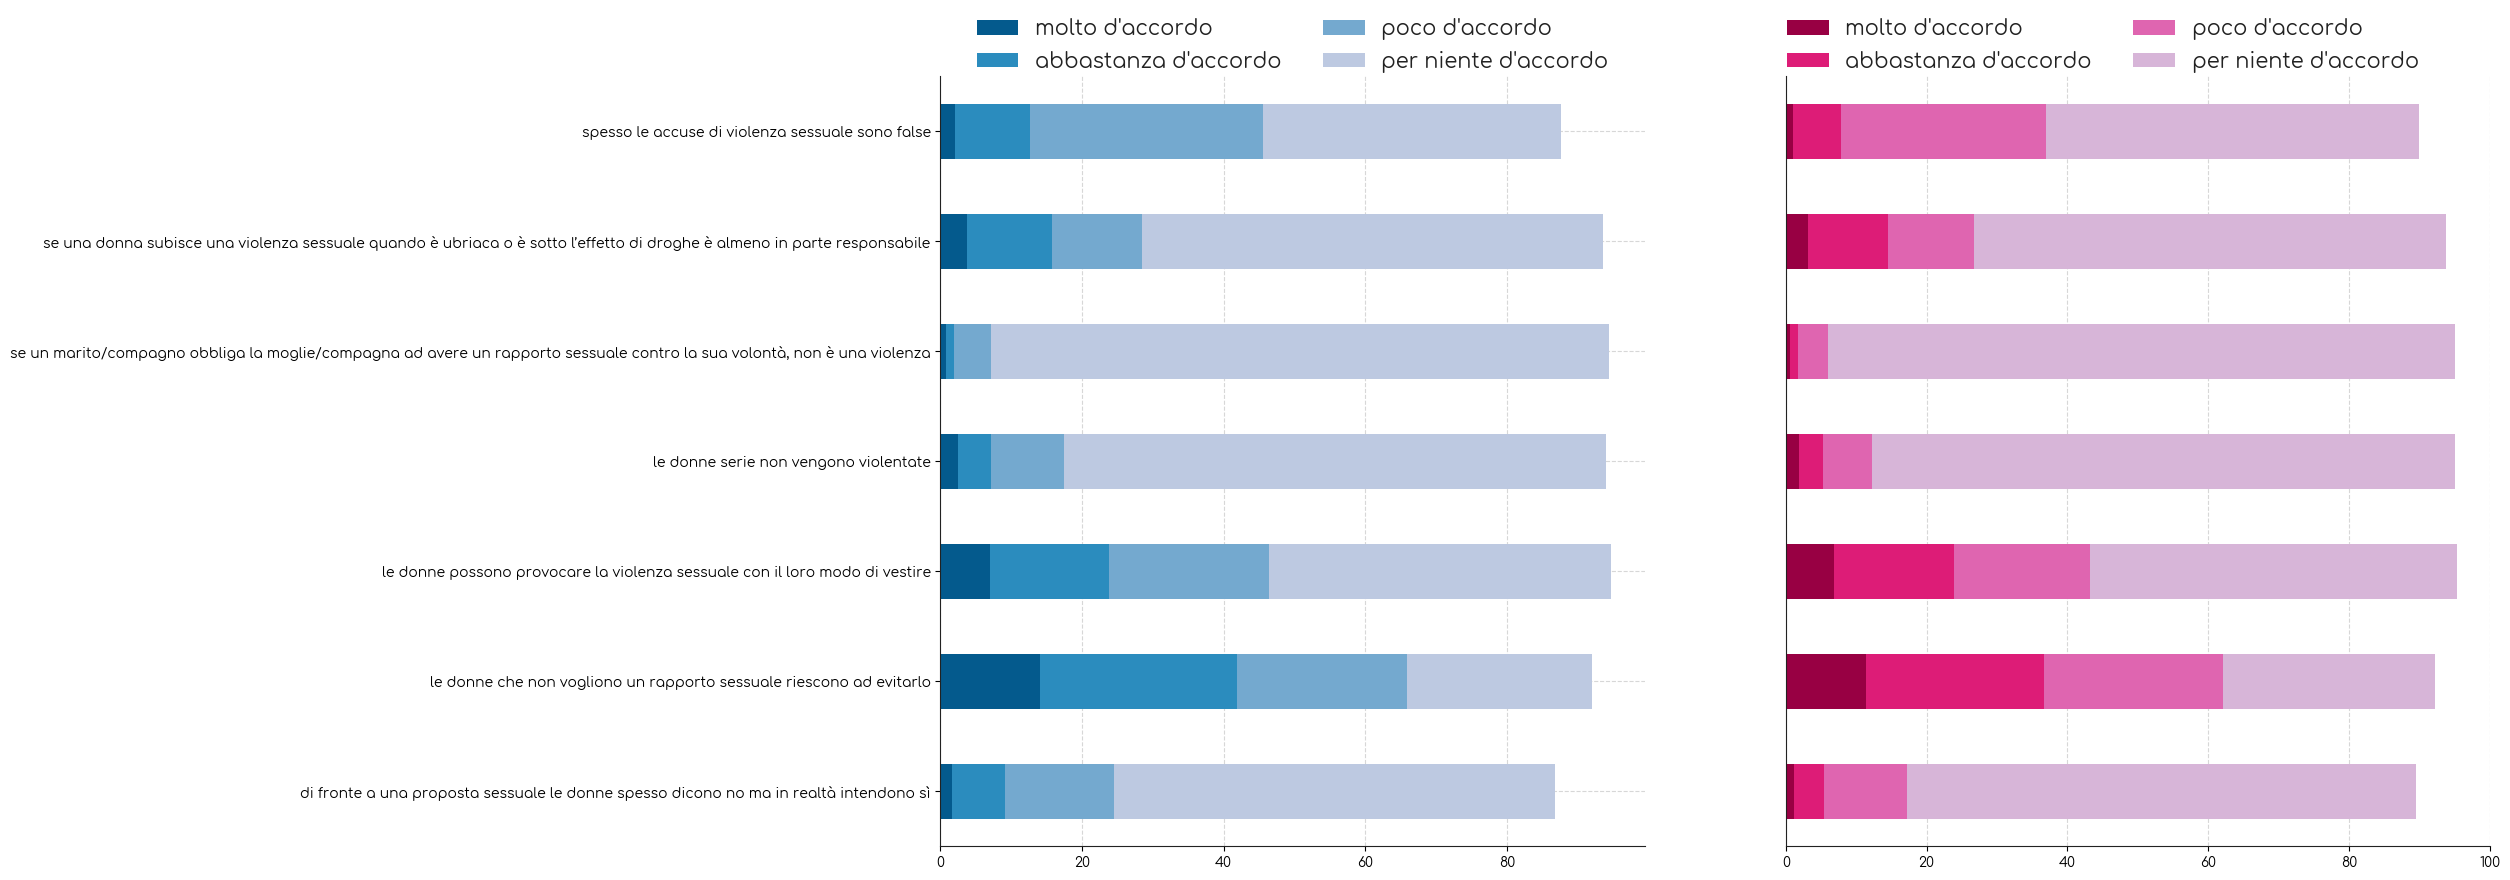

In [12]:
plt.figure(figsize=(20,10))

ax = plt.subplot(121)
df_male_tot_pivot.plot.barh(stacked=True, color=male_colors, ax=ax)
plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=15, shadow=False, framealpha=0)
plt.ylabel("")
plt.grid()

ax = plt.subplot(122)

df_female_tot_pivot.plot.barh(stacked=True, color=female_colors, ax=ax)
plt.legend(loc="upper center",bbox_to_anchor=(0.45, 1.1), ncol=2, fontsize=15, shadow=False, frameon=False)
plt.yticks([])
plt.ylabel("")
plt.grid()


plt.show()

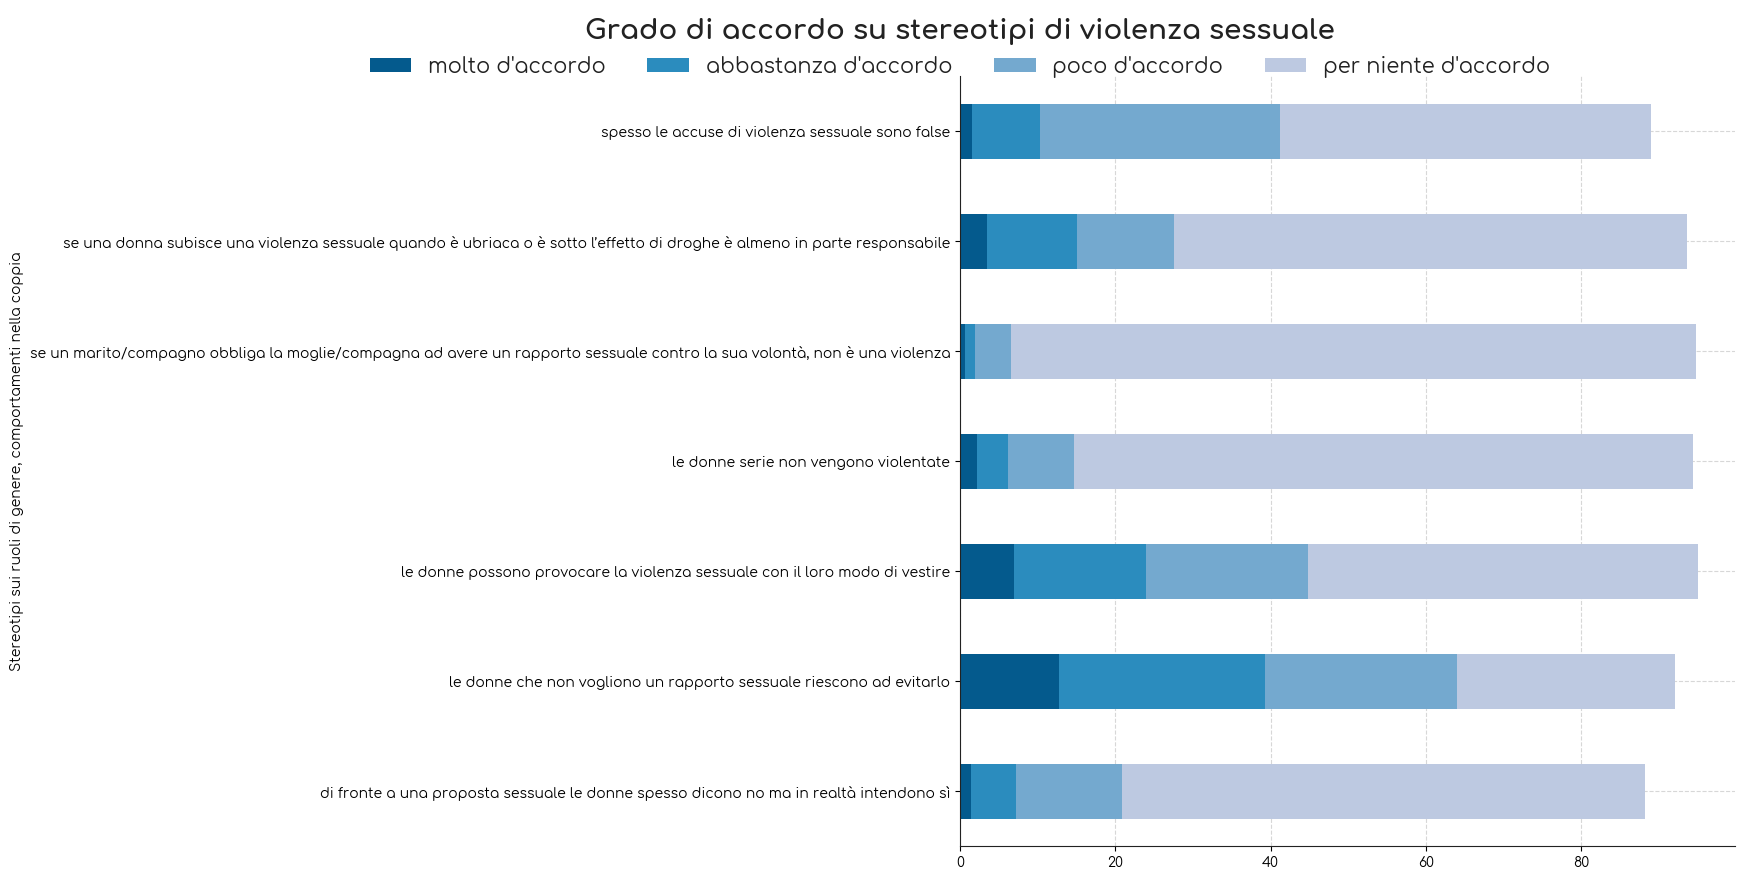

In [13]:
ax = df_all_tot.pivot(index="Stereotipi sui ruoli di genere, comportamenti nella coppia", columns="Grado di accordo", values="Value")[order].plot.barh(
    stacked=True, color=male_colors)

# plt.bar_label(ax.containers[0], padding=3, fmt="%.1f%%")
# plt.bar_label(ax.containers[1], padding=3, fmt="%.1f%%")
# plt.bar_label(ax.containers[2], padding=3, fmt="%.1f%%")
# plt.bar_label(ax.containers[3], padding=3, fmt="%.1f%%")

plt.legend(loc="upper center",bbox_to_anchor=(0, 1.1), ncol=5, fontsize=15, shadow=False, framealpha=0, title="Grado di accordo su stereotipi di violenza sessuale", title_fontproperties={'size':20,'weight':'bold'})
plt.grid()
plt.show()

In [14]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", colors=None, legend_colors=None, figsize=(10,10)):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    fig, axe = plt.subplots(figsize=figsize)

    for i, df in enumerate(dfall) : # for each data frame
        axe = df.plot(kind="barh",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      color=colors[i])  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_y(rect.get_y() + 1 / float(n_df + 1) * i / float(n_col))
                # rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_height(1 / float(n_df + 1))

    axe.set_yticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_yticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color=legend_colors[i], hatch=H * i))

    # l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.6])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.4]) 
    axe .add_artist(l2)
    return axe

In [15]:
labels = df_male_tot_pivot.index
labels

Index(['di fronte a una proposta sessuale le donne spesso dicono no ma in realtà intendono sì',
       'le donne che non vogliono un rapporto sessuale riescono ad evitarlo',
       'le donne possono provocare la violenza sessuale con il loro modo di vestire',
       'le donne serie non vengono violentate',
       'se un marito/compagno obbliga la moglie/compagna ad avere un rapporto sessuale contro la sua volontà, non è una violenza',
       'se una donna subisce una violenza sessuale quando è ubriaca o è sotto l’effetto di droghe è almeno in parte responsabile',
       'spesso le accuse di violenza sessuale sono false'],
      dtype='object', name='Stereotipi sui ruoli di genere, comportamenti nella coppia')

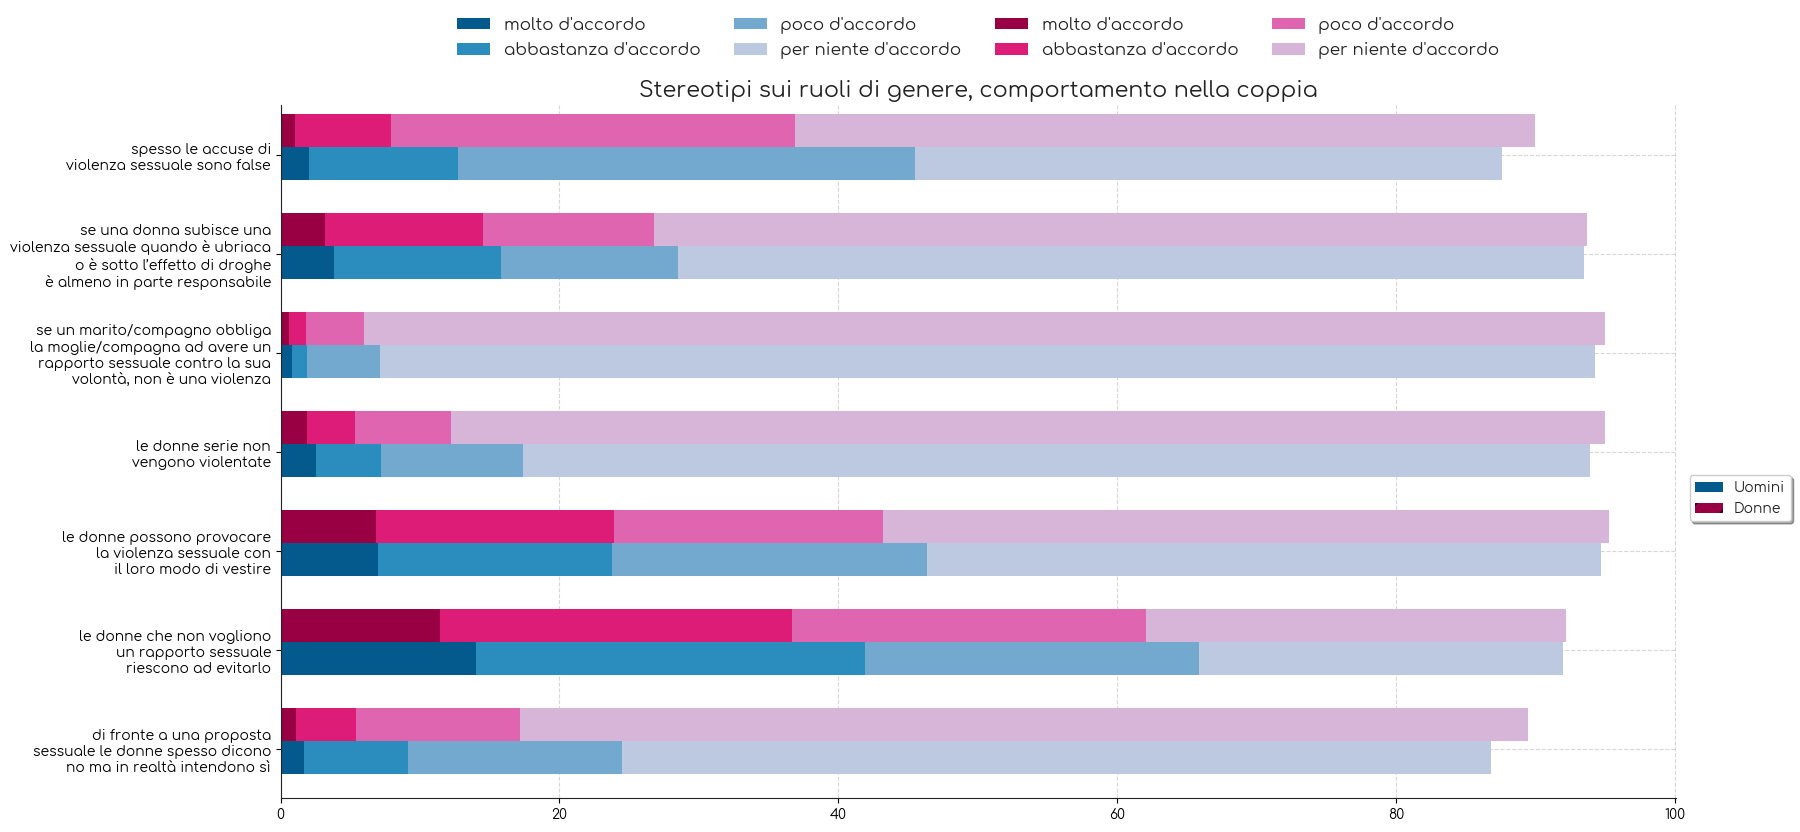

In [25]:
labels_edited = ['di fronte a una proposta\nsessuale le donne spesso dicono\nno ma in realtà intendono sì',
       'le donne che non vogliono\nun rapporto sessuale\nriescono ad evitarlo',
       'le donne possono provocare\nla violenza sessuale con\nil loro modo di vestire',
       'le donne serie non\nvengono violentate',
       'se un marito/compagno obbliga\nla moglie/compagna ad avere un\nrapporto sessuale contro la sua\nvolontà, non è una violenza',
       'se una donna subisce una\nviolenza sessuale quando è ubriaca\no è sotto l’effetto di droghe\nè almeno in parte responsabile',
       'spesso le accuse di\nviolenza sessuale sono false']

plot_clustered_stacked([df_male_tot_pivot, df_female_tot_pivot],["Uomini", "Donne"],
                       colors=[male_colors,female_colors],
                       legend_colors=[male_colors[0], female_colors[0]],
                       title="Stereotipi sui ruoli di genere, comportamento nella coppia",
                       figsize=(18,9))

plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12, shadow=False, frameon=False)
plt.ylabel("")
plt.grid()
plt.xlim(left=0)
plt.yticks(np.arange(7), labels_edited)
plt.show()